## 2주차 미션 소개 - EDA를 통한 머신러닝에 영향을 미치는 주요 변수 확인하기

* EDA 를 통해 어떤 피처가 이탈에 영향을 미치는지 확인하고 피처를 변경해서 모델의 성능 개선해 보기
* EDA는 데이터의 구조, 패턴, 이상치, 변수 간 관계 등을 파악하는 데 도움을 줍니다. 모델링 전 데이터에 대한 이해를 가능하게 합니다. 고객 이탈에 영향을 미치는 중요 변수를 식별함으로써, 더 효과적인 피처 선택을 할 수 있습니다. 불필요하거나 적절하지 않은 피처를 제거함으로써, 모델이 특정 데이터에 과적합되는 것을 방지할 수 있습니다. EDA과정은 모델의 복잡성을 줄이고, 성능을 개선하기 위한 피처엔지니어링 전략을 세우는데 중요합니다.

* 미션 데이터셋 소개
    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

## 미션 1 -  전체 수치 변수를 정답인 이탈 여부로 시각화하고 분석하기
데이터셋의 모든 수치형 변수를 이탈 여부에 따라 시각화하고 수치 구간에 따라 이탈률의 차이에 대해 분석해 주세요.
아래 이미지는 참고용으로 아래 이미지와 똑같이 시각화하지 않아도 됩니다. 이탈 여부를 잘 분석할 수 있는 시각화라면 어떤 시각화든 좋습니다.

<img src="https://i.imgur.com/oCQ9D0l.png">

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

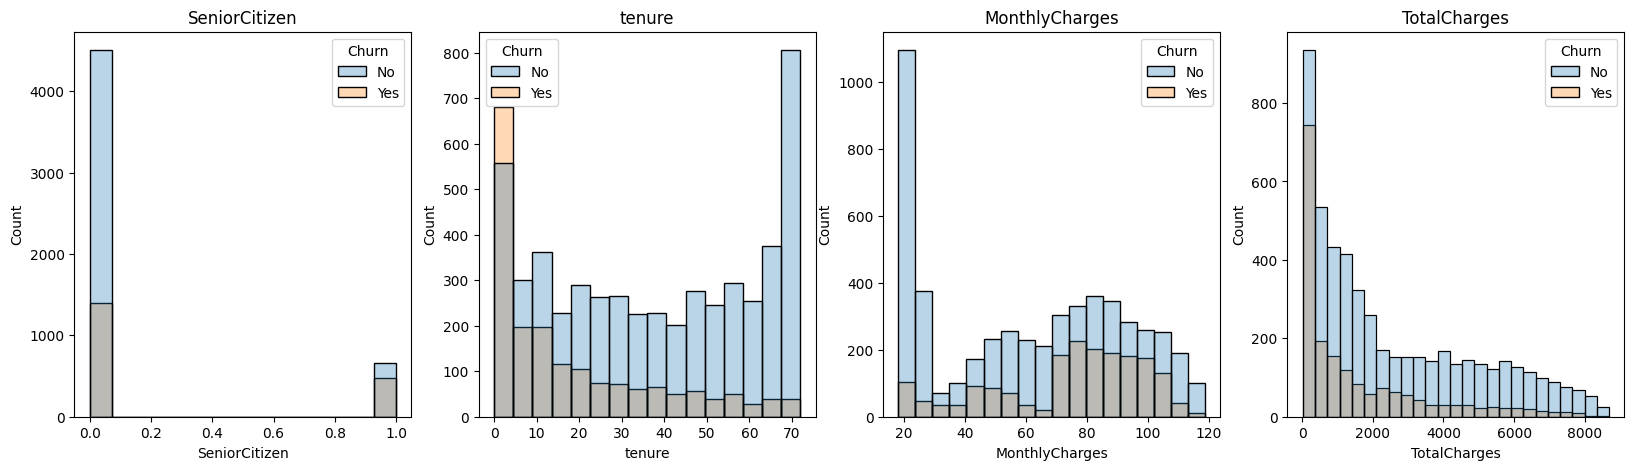

In [ ]:
# 위 예시처럼 수치 변수에 대한 히스토그램을 정답값으로 색상을 다르게 하여 히스토그램으로 시각화 해주세요.
## 수치 변수: SeniorCitizen, tenure, MonthlyCharges, TotalCharges
## 4개의 변수에 대한 시각화
num_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# 각 수치 구간에서의 이탈자 수 시각화
f,ax = plt.subplots(1,4, figsize = (20,5))
for i in range(4):
    sns.histplot(df, x= num_features[i], hue = 'Churn', ax = ax[i], alpha = 0.3)
    ax[i].set_title(num_features[i])
plt.show()


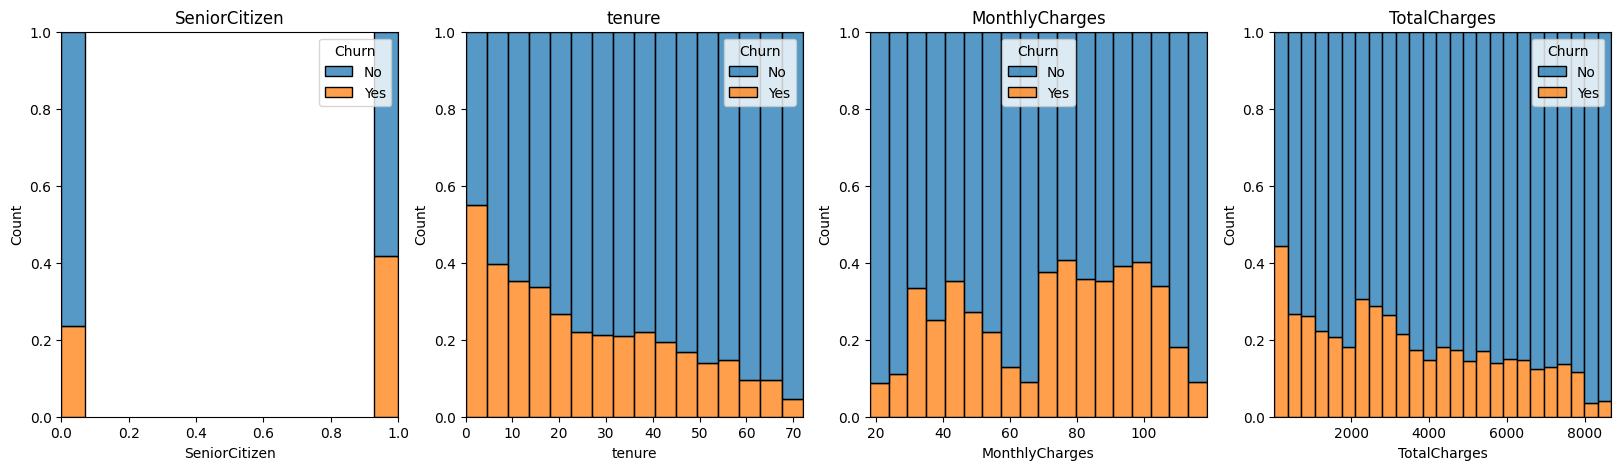

In [ ]:
# 각 수치 구간에서의 이탈률
f,ax = plt.subplots(1,4, figsize = (20,5))
for i in range(4):
    sns.histplot(df, x= num_features[i], hue = 'Churn', multiple = 'fill', ax = ax[i])
    ax[i].set_title(num_features[i])
plt.show()

In [ ]:
# SeniorCitizen 여부에 따른 이탈자 수
pd.crosstab(df.SeniorCitizen, df.Churn)

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


In [ ]:
# SeniorCitizen 여부에 따른 이탈률
pd.crosstab(df.SeniorCitizen, df.Churn, normalize = 'index')

Churn,No,Yes
SeniorCitizen,,
0,0.763938,0.236062
1,0.583187,0.416813


#### **Observations:**
**SeniorCitizen (연령대):**
*   Senior인 경우보다, Senior가 아닌 가입자의 수가 월등하게 많음.
*   이탈자 수: 가입자 수가 많은 Senior가 아닌 가입자의 이탈자 수가 더 많음. (0: 1393, 1: 476)
*   이탈률: Senior인 가입자의 이탈률이 Senior가 아닌 가입자의 이탈률 대비 높음 (0: 0.236, 1: 0.417)
    
    (이탈률: 해당 구간 전체 가입자 대비 이탈자의 수)

**tenure (가입 기간):**
*   이탈자 수: 가입 기간이 길어질수록 이탈하는 가입자의 수는 감소하는 경향을 보이는 반면, 이탈하지 않는 가입자의 수는 큰 경향을 보이지 않음. 다만, 가입 기간이 70인 가입자 중 이탈하지 않는 가입자의 수가 매우 큼.
*   이탈률: 가입 기간이 길어질수록 이탈하는 가입자의 비율이 감소하는 경향을 보임.

    → 모델 학습시, 이탈률로 변환하여 학습하는 것을 고려

**MonthlyCharges (월별 요금):**
*   이탈자 수: 월별 요금이 가장 낮은(약 20) 경우, 이탈하지 않는 가입자의 수가 이탈자 수 대비 매우 많음. 월별 요금이 70~105 수준인 가입자의 이탈자 수가 많아지는 것을 확인할 수 있음.
*   이탈률:  월별 요금이 20-30, 60-70, 110-120인 구간의 이탈률이 낮음.
    
    → 특정 요금 구간에서 이탈률이 낮은 이유는 특정 상품과 연관되어 있을 수도 있어 보임.

**TotalCharges (총 요금):**
*   이탈자 수: 이탈 여부와 관계없이 총 요금이 높아질수록 해당 구간의 이용자 수는 감소하는 경향임. 첫 구간 이후, 이탈하는 가입자의 수가 급격하게 감소함.
*   이탈률: 총 요금 2000-4000 구간을 제외하면 전체적으로 총 요금이 증가할수록 이탈률이 감소하는 경향으로 보임. 특히 총 요금이 8000을 넘는 이용자에서는 이탈률이 매우 낮은 것을 볼 수 있음.


## 미션 2 - 주요 범주형 변수와 정답 값 비교하기

* 범주형 변수가 타겟 변수에 어떤 영향을 미치는지 이해함으로써, 해당 변수의 중요성을 파악할 수 있습니다. 이는 피처 선택 과정에서 중요한 지표가 됩니다. 범주형 변수와 정답 값 간의 관계를 분석함으로써 비즈니스 의사결정, 데이터 전략 수립, 모델 설계에 활용할 수 있습니다. 범주형 변수가 타겟 변수와 강한 관계를 보일 경우, 이는 모델의 예측 성능을 향상시킬 수 있는 중요한 피처임을 알아볼 수 있습니다. 범주형 변수와 정답 값 간의 비교를 통해 예상치 못한 패턴이나 이상치를 발견할 수 있습니다. 이는 데이터 전처리 과정에서 문제점을 해결하고 데이터의 품질을 개선하는 데 도움이 됩니다.
* 주요 범주형 변수와 타겟값인 이탈여부를 분석하는 시각화를 진행하고 그 과정에서 알게된 점을 정리해 주세요.

<img src="https://i.imgur.com/Q1KpQpP.png" width="500">

In [ ]:
nunique = df.nunique()
category_col = nunique[nunique < 5]
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [ ]:
# 다음의 코드를 실행하면 범주형 변수를 볼 수 있습니다.
# 위 예시처럼 시각화를 여기에 구현해 주세요.
category_col_name = category_col.index.tolist()

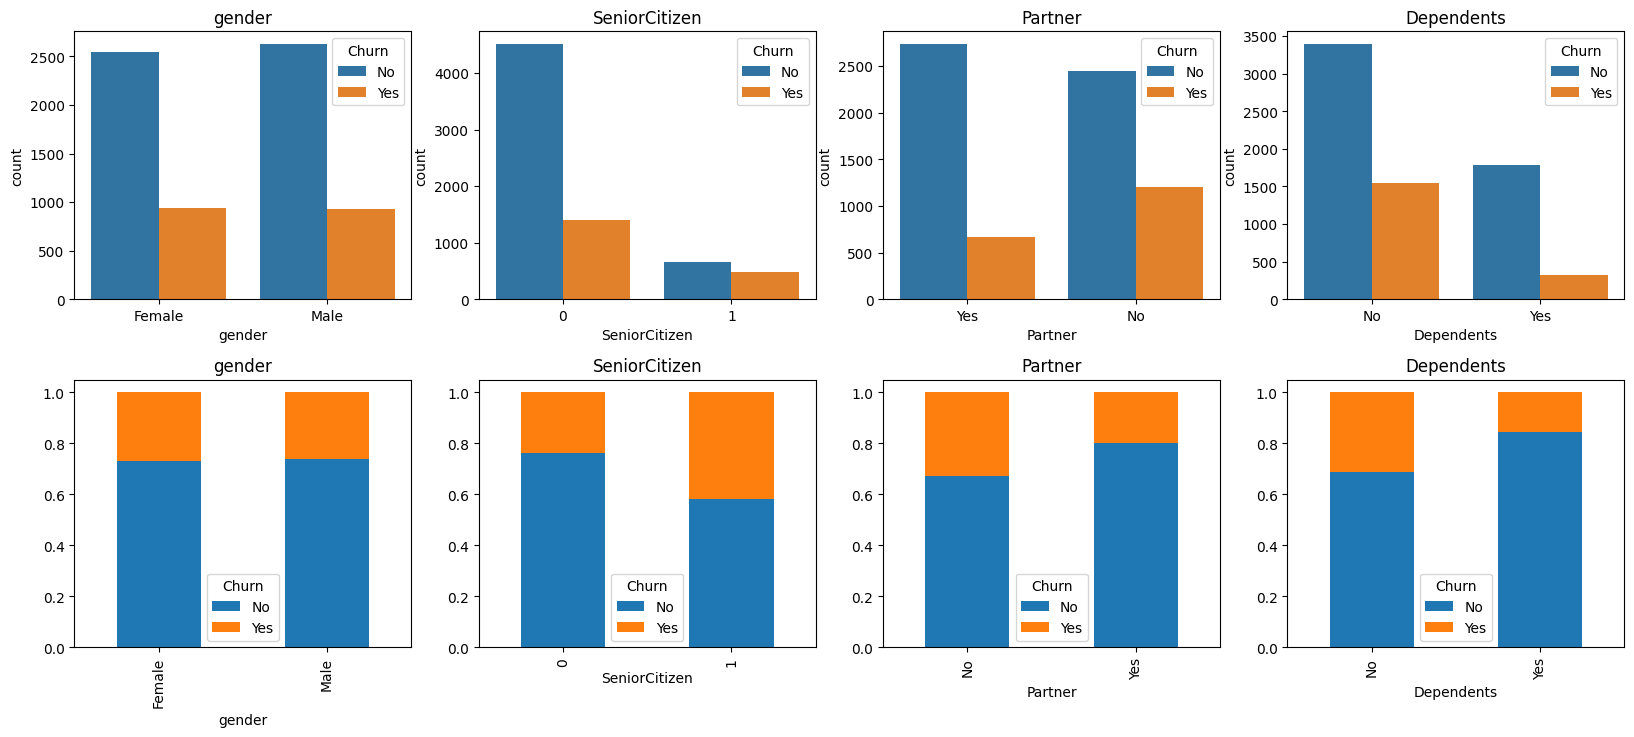

In [ ]:
f,ax = plt.subplots(2,4, figsize = (20,8))
for i in range(4):
    sns.countplot(x=category_col_name[i], hue = 'Churn', data = df, ax = ax[0,i%4])
    ax[0,i%4].set_title(category_col_name[i])
    pd.crosstab(df[category_col_name[i]], df['Churn'],normalize='index').plot(kind = 'bar', stacked= True,
                                                                                    title = category_col_name[i], ax = ax[1,i%4])
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

In [ ]:
# 배우자 여부에 따른 이탈자 수
pd.crosstab(df.Partner, df.Churn)

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


In [ ]:
# 배우자 여부에 따른 이탈률
pd.crosstab(df.Partner, df.Churn, normalize = 'index')

Churn,No,Yes
Partner,,
No,0.670420,0.329580
Yes,0.803351,0.196649


In [ ]:
# 부양가족 여부에 따른 이탈자 수
pd.crosstab(df.Dependents, df.Churn)

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


In [ ]:
# 부양가족 여부에 따른 이탈률
pd.crosstab(df.Dependents, df.Churn, normalize = 'index')

Churn,No,Yes
Dependents,,
No,0.687209,0.312791
Yes,0.845498,0.154502


#### **Observations:**
**Gender(성별):**
*   성별에 따른 이용자 수, 이탈자 수, 이탈자 비율은 유사한 수준으로 보임. 성별은 이탈자 또는 이탈률에 영향을 주지 않는 변수로 보임.

    → 모델 학습시 해당 feature를 사용하지 않는 것을 검토 필요

**SeniorCitizen(연령대):**
*   Senior인 경우보다, Senior가 아닌 가입자의 수가 월등하게 많음.
*   이탈자 수: 가입자 수가 많은 Senior가 아닌 가입자의 이탈자 수가 더 많음. (0: 1393, 1: 476)
*   이탈률: Senior인 가입자의 이탈률이 Senior가 아닌 가입자의 이탈률 대비 높음 (0: 0.236, 1: 0.417)

**Partner(배우자 유무):**
*   이탈자 수: 배우자가 없는 경우 배우자가 있는 경우 대비, 이탈하지 않는 가입자의 수는 조금 적은 반면, 이탈자의 수는 2개 가까이 많은 편임 (Yes: 669, No: 1200)
*   이탈률: 배우자가 없는 경우 배우자가 있는 가입자 대비 이탈률이 높음. (Yes: 0.197, No: 0.330)

**Dependents(부양가족 유무):**
*   부양가족이 있는 가입자보다 부양가족이 없는 가입자의 수가 많음.
*   이탈자 수: 부양가족이 없는 가입자의 이탈자의 수가 부양가족이 있는 가입자의 이탈자 수 대비 약 5배 많음. (Yes: 326, No: 1543)
*   이탈률: 부양가족이 없는 가입자의 이탈률이 부양가족이 있는 가입자 대비 높음. (Yes: 0.155, No: 0.313)


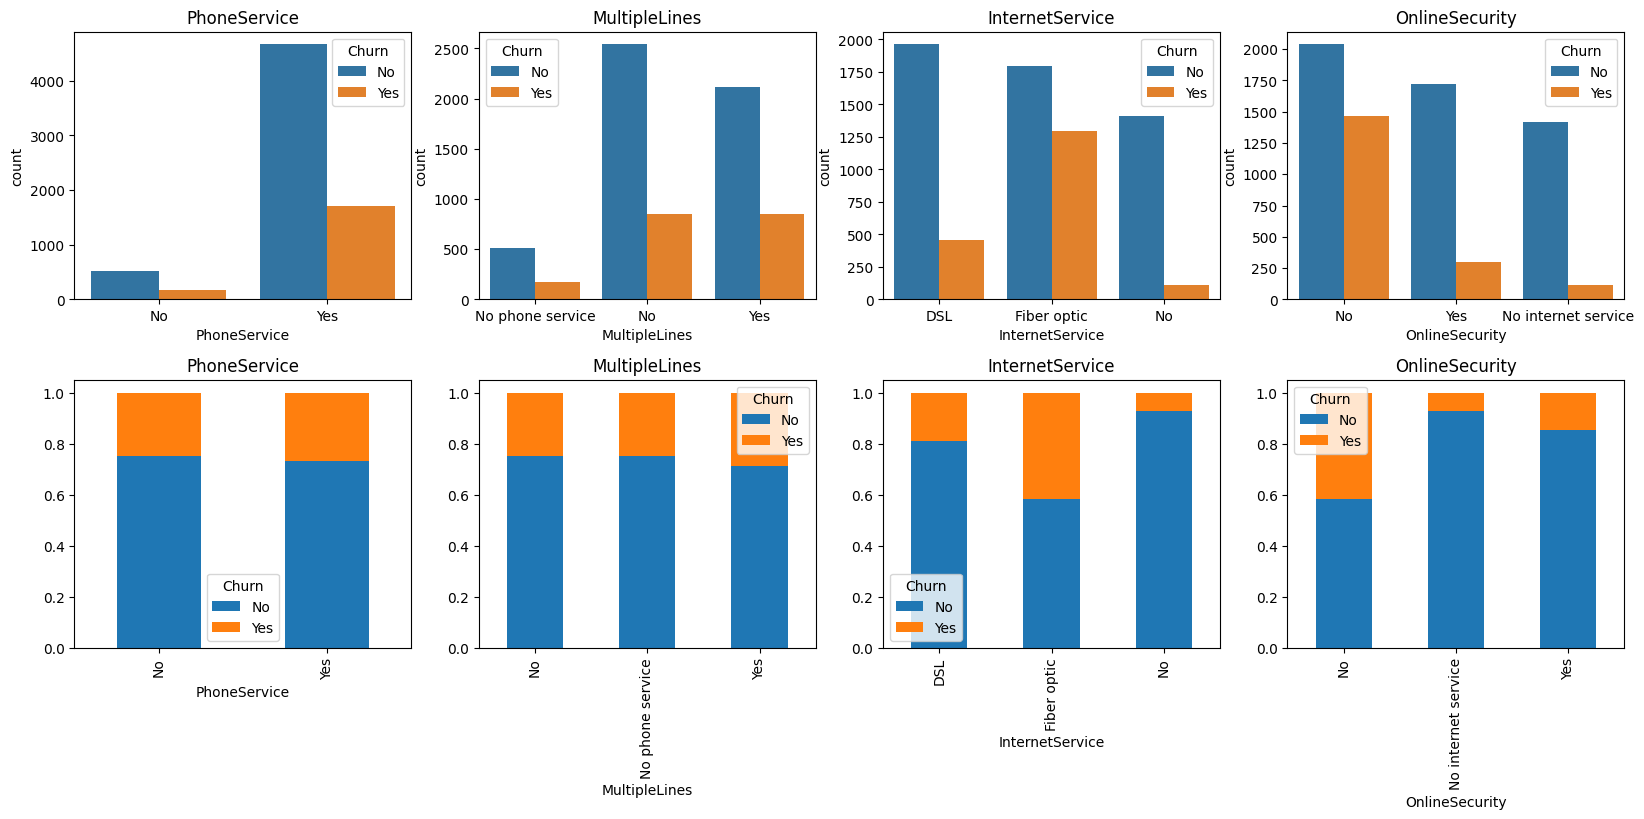

In [ ]:
f,ax = plt.subplots(2,4, figsize = (20,8))
for i in range(4,8):
    sns.countplot(x=category_col_name[i], hue = 'Churn', data = df, ax = ax[0,i%4])
    ax[0,i%4].set_title(category_col_name[i])
    pd.crosstab(df[category_col_name[i]], df['Churn'],normalize='index').plot(kind = 'bar', stacked= True,
                                                                                    title = category_col_name[i], ax = ax[1,i%4])
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

In [ ]:
# 전화서비스 가입 여부에 따른 이탈률
pd.crosstab(df.PhoneService, df.Churn, normalize = 'index')

Churn,No,Yes
PhoneService,,
No,0.750733,0.249267
Yes,0.732904,0.267096


In [ ]:
# 다중 회선 서비스 가입 여부에 따른 이탈률
pd.crosstab(df.MultipleLines, df.Churn, normalize = 'index')

Churn,No,Yes
MultipleLines,,
No,0.749558,0.250442
No phone service,0.750733,0.249267
Yes,0.713901,0.286099


In [ ]:
# 인터넷 서비스 가입 여부에 따른 이탈자 수
pd.crosstab(df.InternetService, df.Churn, margins = True)

Churn,No,Yes,All
InternetService,,,
DSL,1962,459,2421
Fiber optic,1799,1297,3096
No,1413,113,1526
All,5174,1869,7043


In [ ]:
# 인터넷 서비스 가입 여부에 따른 이탈률
pd.crosstab(df.InternetService, df.Churn, normalize = 'index')

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


In [ ]:
# 온라인 보안 서비스 가입 여부에 따른 이탈률
pd.crosstab(df.OnlineSecurity, df.Churn, normalize = 'index')

Churn,No,Yes
OnlineSecurity,,
No,0.582333,0.417667
No internet service,0.925950,0.074050
Yes,0.853888,0.146112


#### **Observations:**

**PhoneService(전화 서비스 가입):**
*   전화 서비스의 가입자 수는 전화 서비스를 가입하지 않은 가입자 수 대비 월등히 많음.
*   이탈자 수: 전화 서비스의 가입자 수가 많기 때문에 이탈자의 수는 전화 서비스를 가입하지 않은 경우보다 많으며, 가압자 또는 이탈자 수로는 전화 서비스 가입 여부에 따른 차이를 확인하기 어려움.
*   이탈률: 전화 서비스 가입 여부에 따른 이탈률은 전화 서비스를 가입한 경우가 소폭 높으나, 큰 차이는 없는 것으로 보임. (Yes 0.249, No: 0.267)

**MultipleLines(다중회선 서비스 가입):**
*   이탈자 수: 다중 회선 서비스 가입 여부에 따른 이탈자의 수는 유사해 보임.
*   이탈률: 다중 회선 서비스 가입자의 이탈률이 다중 회선 서비스를 가입하지 않은 가입자 대비 소폭 높음. 다중회선 서비스를 가입하지 않은 가입자와 전화 서비스를 가입하지 않은 가입자의 이탈률은 유사 수준임.

    (No Phone service: 0.249, No: 0.250, Yes: 0.286)

**InternetService(인터넷 서비스 가입):**
*   전체 가입자 중 인터넷 서비스를 가입한 가입자(DSL+Fiber optic) 수는 인터넷 서비스를 가입하지 않는 가입자 대비 많음.
*   이탈자 수: 인터넷 서비스 가입자 중 Fiber optic 서비스 가입자의 이탈자 수가 DSL 서비스 가입자 대비 약 3배 정도 많음.

    (DSL: 459, Fiber Optic: 1297, No: 113)
*   이탈률: 인터넷 서비스 가입자 중 Fiber optic 서비스 가입자의 이탈률은 0.419 정도 수준으로 매우 높음. 반면 인터넷 서비스를 가입하지 않은 가입자의 이탈률은 0.074로 가장 낮음.

    (DSL: 0.190, Fiber Optic: 0.419, No: 0.074)

**OnlineSecurity(온라인 보안 서비스 가입):**
*   이탈자 수: 온라인 보안 서비스를 가입하지 않은 가입자의 이탈자 수가 서비스를 가입한 가입자 대비 이탈자 수가 많음.
*   이탈률: 온라인 보안 서비스를 가입하지 않은 가입자의 이탈률이 0.418로 가장 높은 반면, 서비스를 이용하는 가입자의 이탈률은 0.146으로 낮은 수준임.


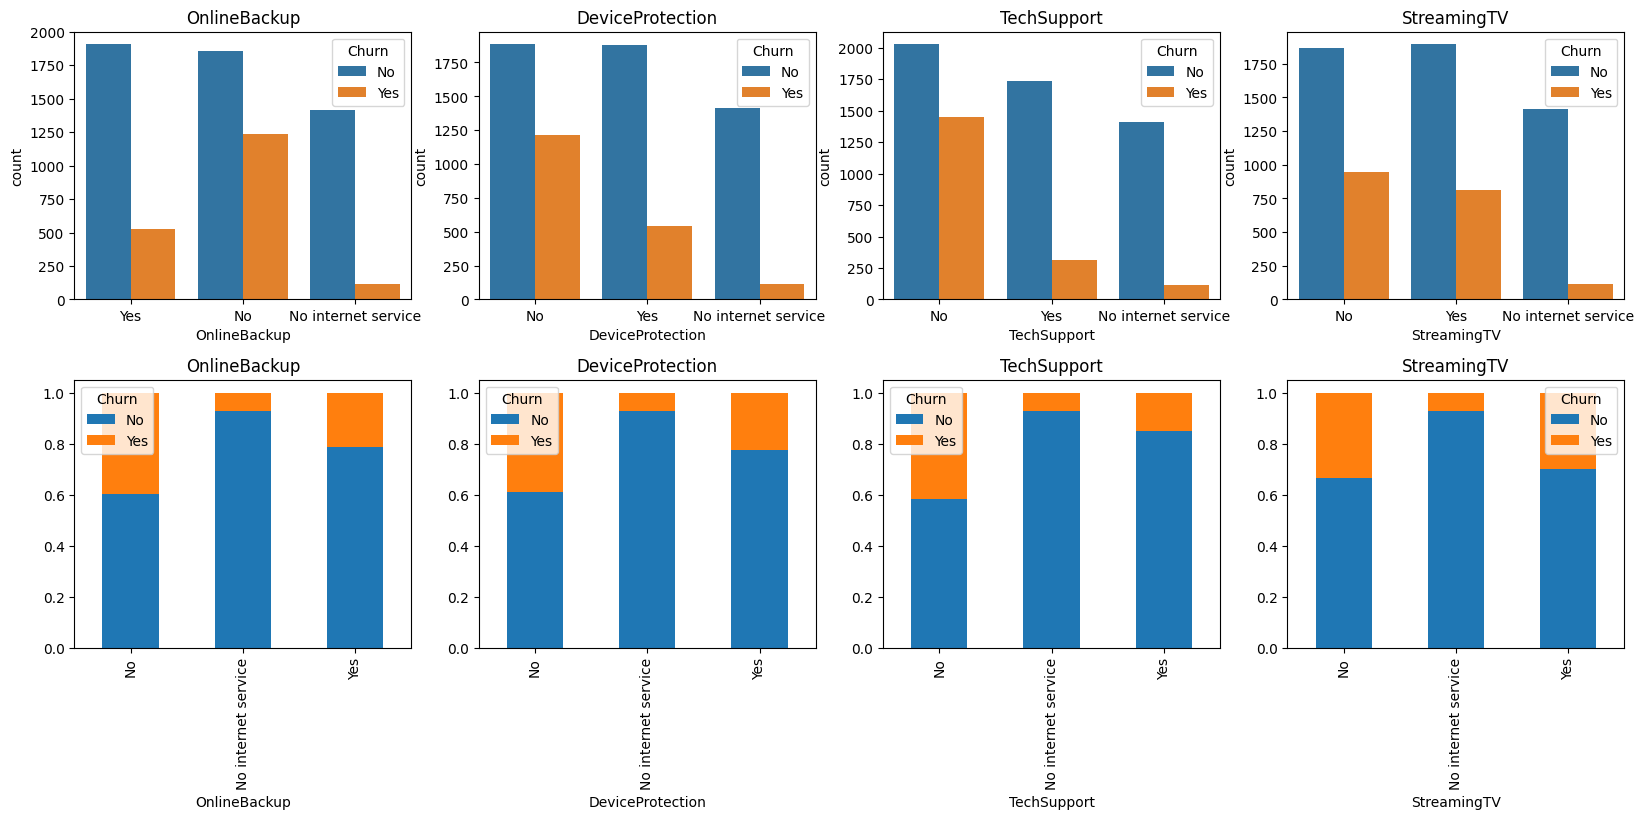

In [ ]:
f,ax = plt.subplots(2,4, figsize = (20,8))
for i in range(8,12):
    sns.countplot(x=category_col_name[i], hue = 'Churn', data = df, ax = ax[0,i%4])
    ax[0,i%4].set_title(category_col_name[i])
    pd.crosstab(df[category_col_name[i]], df['Churn'],normalize='index').plot(kind = 'bar', stacked= True,
                                                                                    title = category_col_name[i], ax = ax[1,i%4])
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

In [ ]:
# 온라인 보안 서비스 가입 여부에 따른 이탈률
pd.crosstab(df.OnlineBackup, df.Churn, normalize = 'index')

Churn,No,Yes
OnlineBackup,,
No,0.600712,0.399288
No internet service,0.925950,0.074050
Yes,0.784685,0.215315


In [ ]:
# 온라인 보안 서비스 가입 여부에 따른 이탈률
pd.crosstab(df.DeviceProtection, df.Churn, normalize = 'index')

Churn,No,Yes
DeviceProtection,,
No,0.608724,0.391276
No internet service,0.925950,0.074050
Yes,0.774979,0.225021


In [ ]:
# 온라인 보안 서비스 가입 여부에 따른 이탈률
pd.crosstab(df.TechSupport, df.Churn, normalize = 'index')

Churn,No,Yes
TechSupport,,
No,0.583645,0.416355
No internet service,0.925950,0.074050
Yes,0.848337,0.151663


In [ ]:
# 스트리밍TV 서비스 가입 여부에 따른 이탈자 수
pd.crosstab(df.StreamingTV, df.Churn, margins = True)

Churn,No,Yes,All
StreamingTV,,,
No,1868,942,2810
No internet service,1413,113,1526
Yes,1893,814,2707
All,5174,1869,7043


In [ ]:
# 스트리밍TV 서비스 가입 여부에 따른 이탈률
pd.crosstab(df.StreamingTV, df.Churn, normalize = 'index')

Churn,No,Yes
StreamingTV,,
No,0.664769,0.335231
No internet service,0.925950,0.074050
Yes,0.699298,0.300702


#### **Observations:**

**OnlineBackup(온라인 백업 서비스 가입):**
*   이탈자 수: 온라인 백업 서비스를 사용하지 않는 가입자의 이탈자 수가 서비스를 이용하는 가입자 대비 많음.
*   이탈률: 온라인 백업 서비스를 사용하지 않는 가입자의 이탈률이 서비스를 이용하는 가입자 대비 높음.

    (Yes: 0.215, No: 0.400, No internet Service: 0.074)

**DeviceProtection(장치보호 서비스 가입):**
*   이탈자 수: 장치보호 서비스를 사용하지 않는 가입자의 이탈자 수가 서비스를 이용하는 가입자 대비 많음.
*   이탈률: 장치보호 서비스를 사용하지 않는 가입자의 이탈률이 서비스를 이용하는 가입자 대비 높음.

    (Yes: 0.225, No: 0.391, No internet Service: 0.074)

**TechSupport(기술지원 서비스 가입):**
*   이탈자 수: 기술지원 서비스를 사용하지 않는 가입자의 이탈자 수가 서비스를 이용하는 가입자 대비 많음.
*   이탈률: 기술지원 서비스를 사용하지 않는 가입자의 이탈률이 서비스를 이용하는 가입자 대비 높음.

    (Yes: 0.152, No: 0.416, No internet Service: 0.074)

**StreamingTV(스트리밍TV 서비스 가입):**
*   이탈자 수: 스트리밍TV 서비스를 가입하지 않은 가입자의 이탈자 수가 서비스를 가입한 가입자 대비 이탈자 수는 유사한 수준임

    (Yes: 814, No: 942, No internet Service: 113)

*   이탈률: 스트리밍TV 서비스를 사용하지 않는 가입자의 이탈률이 서비스를 이용하는 가입자 대비 유사 수준임

    (Yes: 0.300, No: 0.335, No internet Service: 0.074)

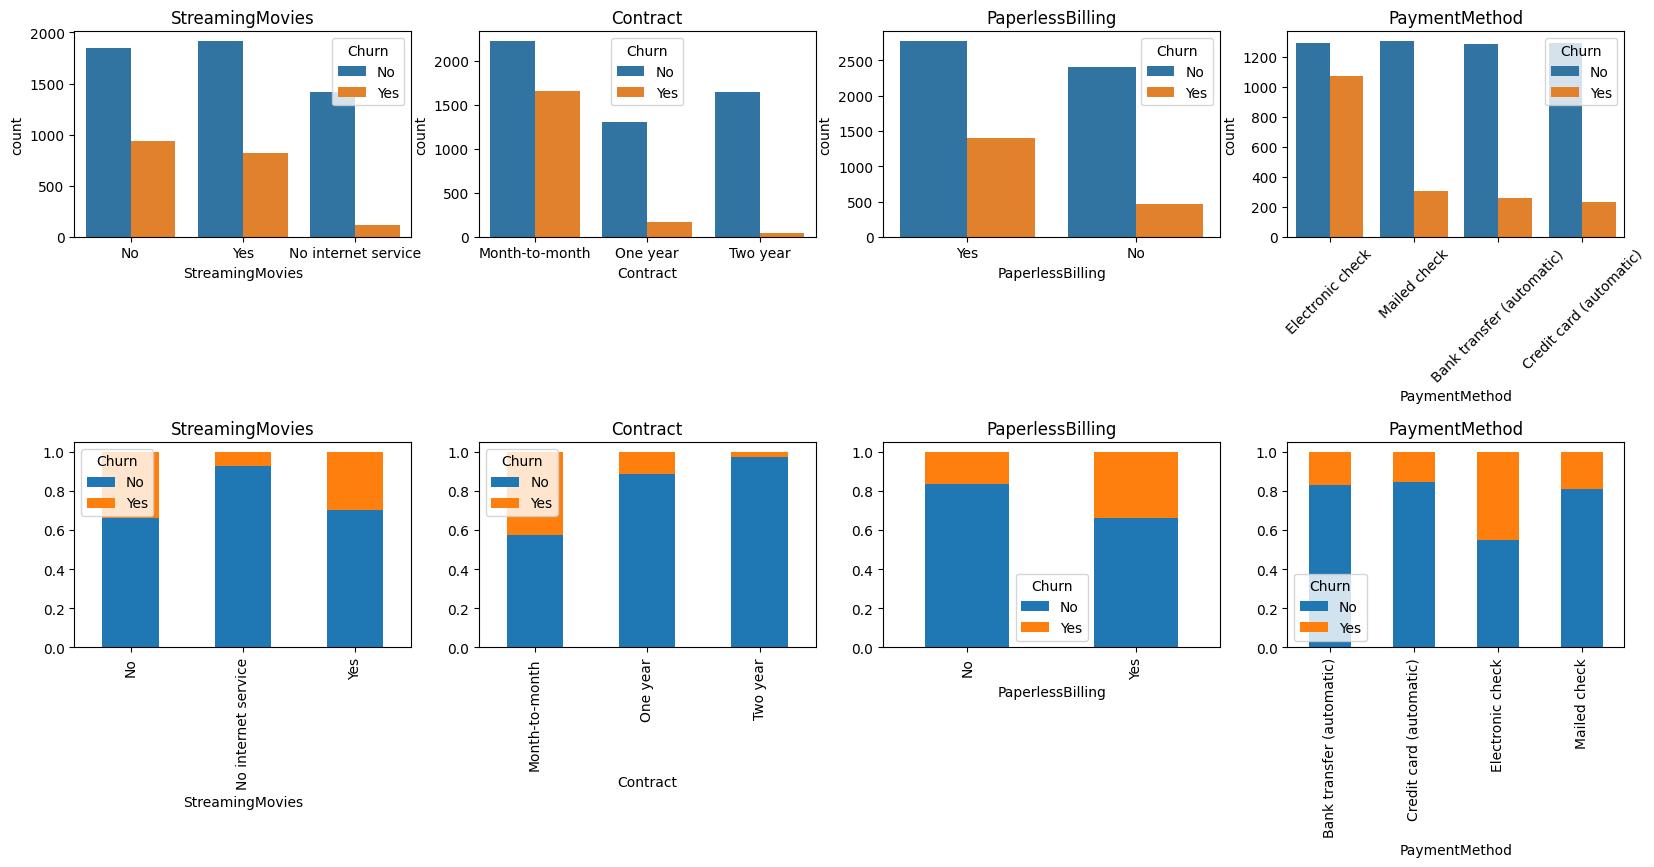

In [ ]:
f,ax = plt.subplots(2,4, figsize = (20,8))
for i in range(12,16):
    sns.countplot(x=category_col_name[i], hue = 'Churn', data = df, ax = ax[0,i%4])
    ax[0,i%4].set_title(category_col_name[i])
    pd.crosstab(df[category_col_name[i]], df['Churn'],normalize='index').plot(kind = 'bar', stacked= True,
                                                                                    title = category_col_name[i], ax = ax[1,i%4])
ax[0,3].tick_params(axis='x', rotation = 45)
plt.subplots_adjust(wspace = 0.2, hspace = 1)
plt.show()

In [ ]:
# 스트리밍TV 서비스 가입 여부에 따른 이탈자 수
pd.crosstab(df.StreamingMovies, df.Churn, margins = True)

Churn,No,Yes,All
StreamingMovies,,,
No,1847,938,2785
No internet service,1413,113,1526
Yes,1914,818,2732
All,5174,1869,7043


In [ ]:
# 스트리밍TV 서비스 가입 여부에 따른 이탈률
pd.crosstab(df.StreamingMovies, df.Churn, normalize = 'index')

Churn,No,Yes
StreamingMovies,,
No,0.663196,0.336804
No internet service,0.925950,0.074050
Yes,0.700586,0.299414


In [ ]:
# 계약 유형에 따른 이탈자 수
pd.crosstab(df.Contract, df.Churn, margins = True)

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [ ]:
# 계약 유형에 따른 이탈률
pd.crosstab(df.Contract, df.Churn, normalize = 'index')

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [ ]:
# 무페이퍼 청구 여부에 따른 이탈률
pd.crosstab(df.PaperlessBilling, df.Churn, normalize = 'index')

Churn,No,Yes
PaperlessBilling,,
No,0.836699,0.163301
Yes,0.664349,0.335651


In [ ]:
# 결제 방법에 따른 이탈률
pd.crosstab(df.PaymentMethod, df.Churn, normalize = 'index')

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


#### **Observations:**

**StreamingMovies(스트리밍 영화 서비스 가입):**
*   이탈자 수: 스트리밍 영화서비스를 가입하지 않은 가입자의 이탈자 수가 서비스를 가입한 가입자 대비 이탈자 수는 유사한 수준임

    (Yes: 818, No: 938, No internet Service: 113)

*   이탈률: 스트리밍 영화 서비스를 사용하지 않는 가입자의 이탈률이 서비스를 이용하는 가입자 대비 유사 수준임

    (Yes: 0.299, No: 0.337, No internet Service: 0.074)

**Contract(계약 유형):**
*   Month-to-Month 계약한 가입자의 수가 가장 많으며, 1년 계약과 2년 계약을 한 가입자의 수는 유사한 수준임.
*   이탈자 수: Month-to-Month 계약을 한 가입자의 이탈자 수가 매우 많으며, 1년 계약, 2년 계약으로 갈수록 이탈자의 수가 감소하는 경향임.
*   이탈률: Month-to-Month 계약을 한 가입자의 이탈률이 가장 높으며, 1년 계약, 2년 계약으로 갈수록 이탈률이 감소하는 경향임.

    (Month-to-Month: 0.427, No: 0.113, No internet Service: 0.028)

**PaperlessBilling(무페이퍼 청구):**
*   이탈자 수: 무페이퍼 청구를 이용하는 가입자의 이탈자의 수가 이용하지 않는 가입자 대비 많음.
*   이탈률: 무페이퍼 청구를 이용하는 가입자의 이탈률이 이용하지 않는 가입자의 이탈률 대비 약 2배 높음.

    (Yes: 0.336, No: 0.163)

**PaymentMethod(결제방법):**
*   이탈자 수: 다른 결제 방법 대비 electronic check를 이용하는 가입자의 이탈자 수가 가장 많음. Mail check, Bank transfer (automatic), Credit card (automatic)의 순으로 이탈자 수가 감소하는 경향임.
*   이탈률: 다른 결제 방법 대비 electronic check를 이용하는 가입자의 이탈률이 가장 높음. Mail check, Bank transfer (automatic), Credit card (automatic)의 순으로 이탈률이 소폭 감소하는 경향임.

    (Bank transfer (automatic): 0.167, Credit card (automatic): 0.152. Electronic check: 0.453, Mailed check: 0.191)

## 미션 3 - 수치변수 간의 관계를 파악하기 위해 그래프를 시각화 하고 상관계수를 구해주세요.


상관계수를 통해 변수들 간의 선형적 관계를 파악합니다. 높은 상관관계를 보이는 변수들을 식별하여, 중복되거나 불필요한 특징을 제거함으로써 모델의 성능을 최적화할 수 있습니다. 강한 상관관계를 가진 변수들을 식별하여, 다중공선성 문제를 방지합니다. 상관 행렬을 시각화하여 데이터의 패턴과 특성을 더 잘 이해하고, 피처엔지니어링에 어떻게 활용할지 시각화 결과를 해석해 보세요. 또, 아래 예시와 똑같이 구해도 되지만 다른 변수를 추가하거나 여러분만의 인사이트를 추가해서 구해도 좋습니다.


|                |   SeniorCitizen |    tenure |   MonthlyCharges |
|:---------------|----------------:|----------:|-----------------:|
| SeniorCitizen  |       1         | 0.0165669 |         0.220173 |
| tenure         |       0.0165669 | 1         |         0.2479   |
| MonthlyCharges |       0.220173  | 0.2479    |         1        |




<table>
    <tr>
        <td><img src="https://i.imgur.com/RTfJDJN.png" width="300"></td>
        <td><img src="https://i.imgur.com/41Y04lj.png" width="300"></td>
    </tr>
</table>

<Axes: >

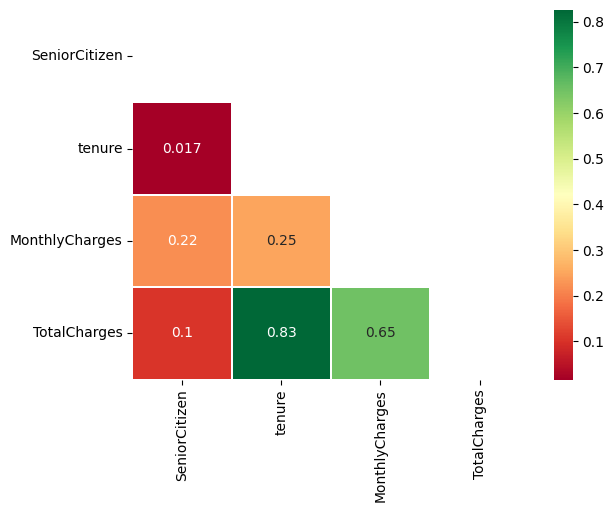

In [ ]:
# 여기에 상관계수를 구하고 heatmap 으로 시각화 해주세요.
mask = np.zeros_like(df[num_features].corr(), dtype= bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df[num_features].corr(), annot = True, cmap='RdYlGn', linewidth=0.2, mask = mask)

* tenure와 TotalCharges, MonthlyCharges와 TotalCharges간의 상관관계 계수 값이 0.83, 0.65로 높은 수준임을 확인. 각각의 변수 간 상관관계가 높음.
    → 모델 구성시, 상관관계가 높은 feature를 사용하는 경우 모델의 성능이 저하될 수 있기 때문에 TotalCharges feature 1개만 사용하는 것이나, TotalCharges를 제외하고 tenure와 MonthlyCharges featrue 2개만 사용하는 것을 고려할 필요가 있어 보임.

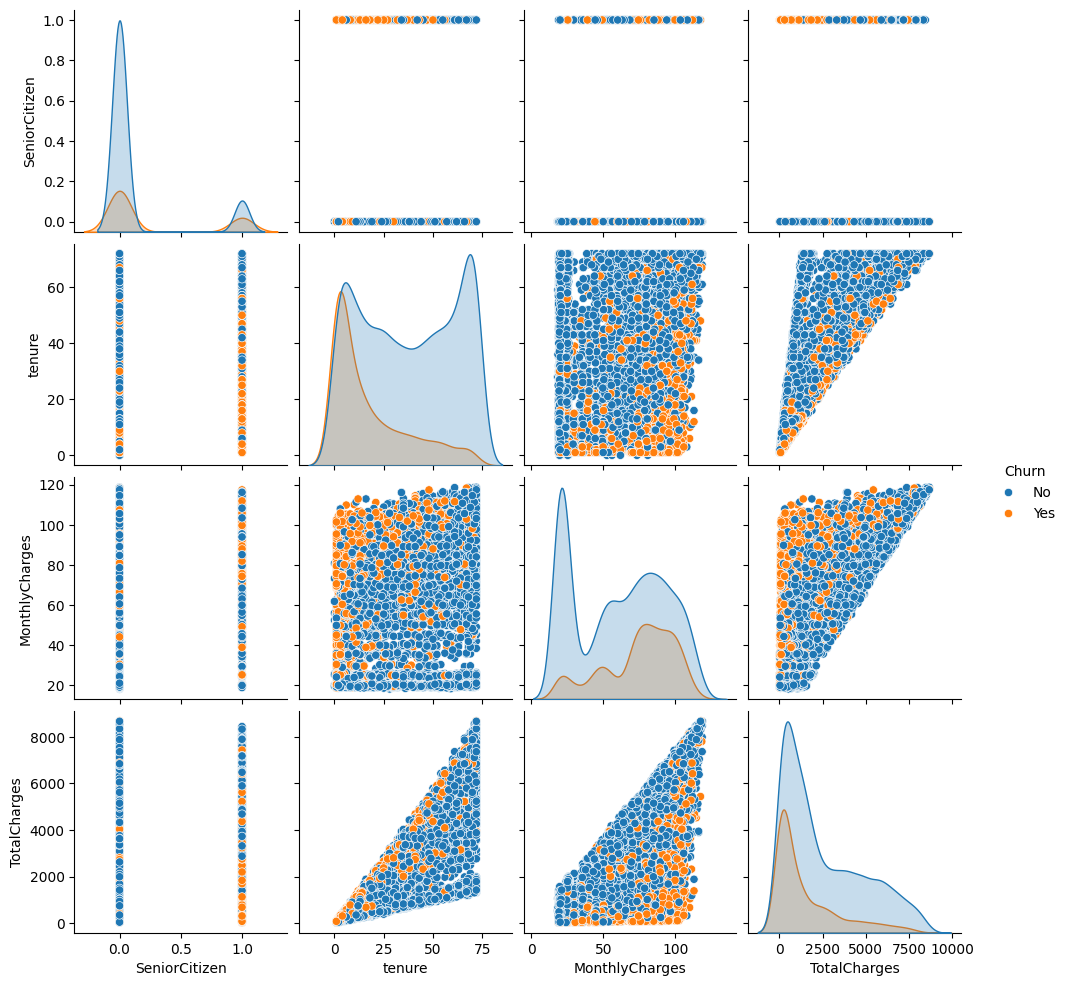

In [ ]:
# seaborn 의 pairplot 으로 이탈여부(Churn)에 따라 시각화 해주세요.
sns.pairplot(df, hue = 'Churn')